## Baseball league match win prediction:-
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

### Data Set

Dataset contain 17 Variable, 16 are independent veriable , while 1 is taget or dependent variable.

Input features: 

Runs --> R

At Bats --> AB

Hits --> H

Doubles -->2B

Triples -->3B

Homeruns -->HR

Walks -->BB

Strikeouts -->SO

Stolen Bases --> SB

Runs Allowed --> RA

Earned Runs --> ER

Earned Run Average (ERA) -->ERA 

Shutouts --> SHO

Saves --> SV

Errors -->E

Target:-

Win --> W

### Problem:-

On the basis of given input feature, we need to predict win of individual Team. WIN is continuous veriable hence this is regression problem and we will use different regression aloritham to predict the Win count of team. 



# Import packages

In [450]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

### Load Dataset in Pandas DataFrame

In [2]:
df=pd.read_csv('baseball.csv') #loading the data set

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Observation:-
All Field in dataset are numerical, we will further check its datatype.

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

### Observation:- 
All Fields are interger type data except Earned Run Average,it is float data type.

### Check for dataset feture

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.shape

(30, 17)

### Observation:- 
Dataset contain 17 columns(Variable) and 30 Rows.

## Null Value check in Dataset

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Text(0.5, 1.0, 'Null Value Heat Map')

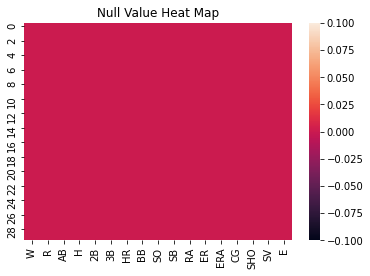

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Value Heat Map")

### Observation:- 
1. Null or missing values not exist in data set.

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observation:-
1. Count of all the variable /label are same, it indicate that dataset has no missing value, same is visible im null value heat map as well.
2. All 17 column has be considered in describe , means all variable has numarical value.
3. Mean and Median of every column has very less difference, indicating that columns having very less skewness, for some columns(R, 2B, 3B,SB,ERA, CG, SHO) difference is less then 1, it indicate the these column are equally distributed and creating ball shape curve.we will verify this thing in further steps.
4. mean and Max value has no abnormal /huge difference, it denotes that dataset doesn't contain outlier, but we will further cross check this thing in further steps.

### Check Correlation of different variable with target variable.

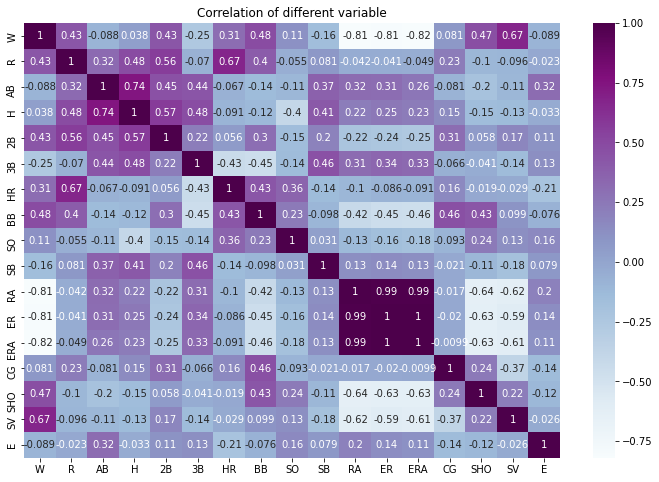

In [10]:
fig=plt.figure(figsize=(12,8))
hc=df.corr(method='pearson')
plt.title("Correlation of different variable")
sns.heatmap(hc,annot=True,cmap="BuPu")
plt.show()

In [11]:
corr_matrix = df.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

### Observation:-
1. SV,BB,SHO,R,2B,HR,SO has strong positive correlation with Target variable(Win).
2. CG,H as week possitive correlation with Target Variable.
3. ERA, RA, ER, 3B, SB has strong negative correlation with Target Variable(W).


### Check for Outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

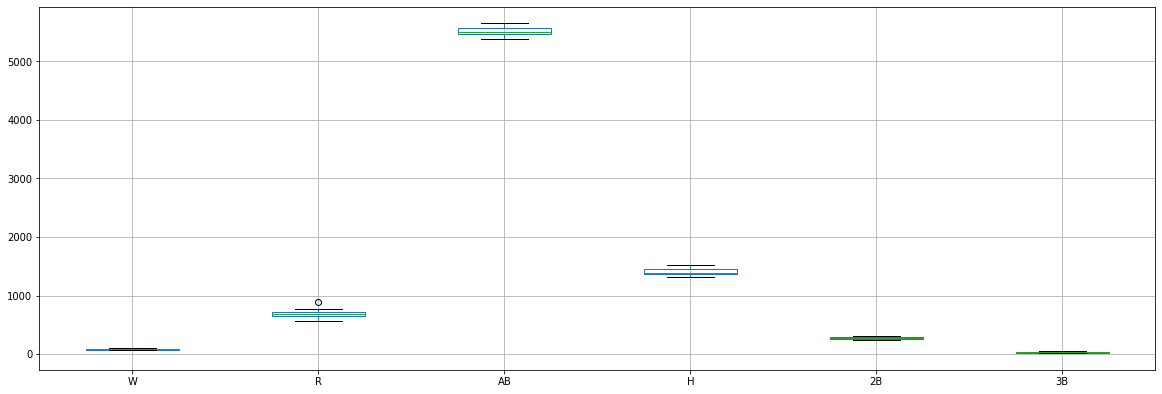

In [12]:
#First 5 columns box plot
df.iloc[ :,0:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

### Observation:-
Column R has outlier, but it near to whisker, hence we can assume this could be valid score achived by a team.

<function matplotlib.pyplot.show(close=None, block=None)>

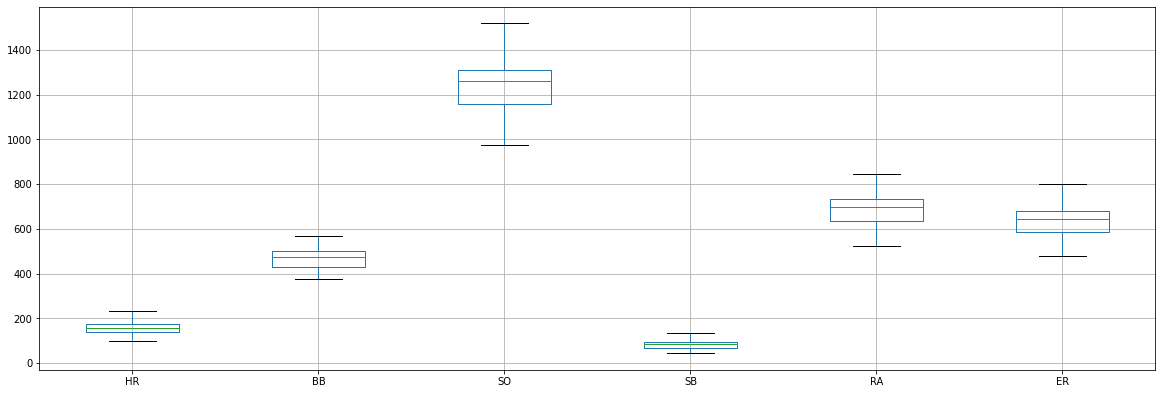

In [13]:
#First 5 columns box plot
df.iloc[ :,6:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

### Observation:-

No Outliers exist in these columns.

<function matplotlib.pyplot.show(close=None, block=None)>

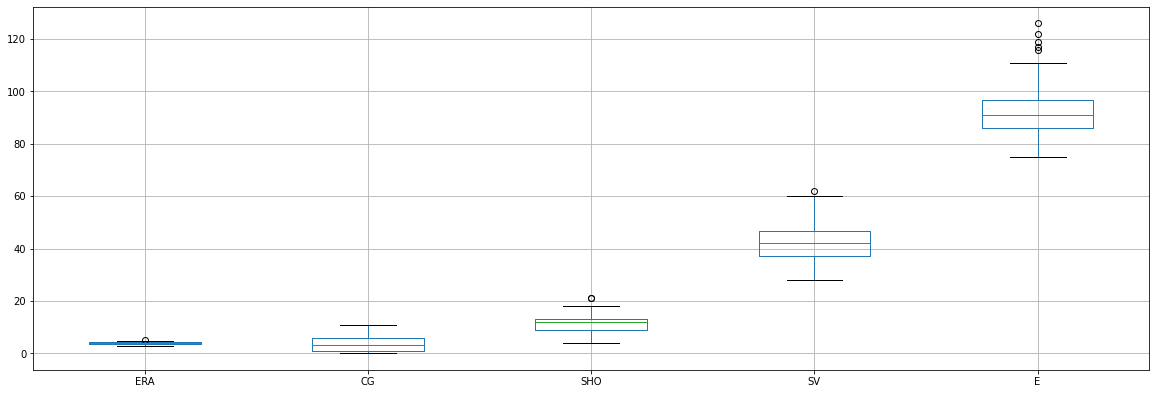

In [14]:
#First 5 columns box plot
df.iloc[ :,12:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

### Observation:- 

SHO SV and E variable has some outlier, but these outlier are very near to whishkers, we can say these values are valid values which can not be removed from dataset.

### Observation:-
Combained box plot of dataset shows that there are some variable which may have outliers exist. we will plot individual box plot for more inside.

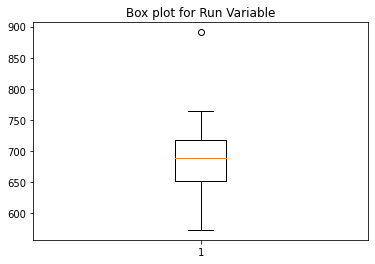

In [15]:
plt.boxplot(df['R'])
plt.title("Box plot for Run Variable")
plt.show()

### Observation:-
There is one outlier visible in Box plot, but this is not very far from whisker.every row in this dataset represent a team in this dataset, outlier removel will remove that row, means will exclude that team from consideration, which is not fesiable solution.

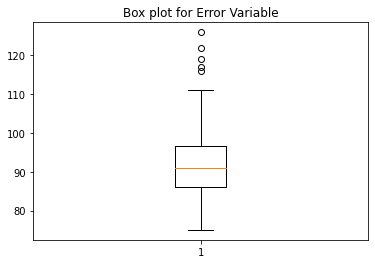

In [16]:
plt.boxplot(df['E'])
plt.title("Box plot for Error Variable")
plt.show()

### Observation:-
1. There is some outlier visible in Box plot, but these are not very far from whisker.
2. also every row in this dataset represent a team in this dataset, outlier removel will remove that row, means will exclude that team from consideration, which is not fesiable solution.

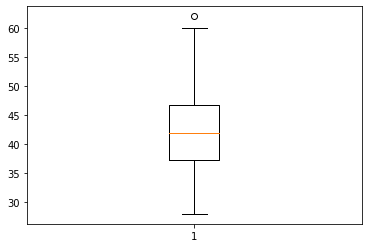

In [17]:
plt.boxplot(df['SV'])
plt.show()

### Observation:-
There is one outlier visible in Box plot, but this is not very far from whisker.every row in this dataset represent a team in this dataset, outlier removel will remove that row, means will exclude that team from consideration, which is not fesiable solution.

### Check for Skewness

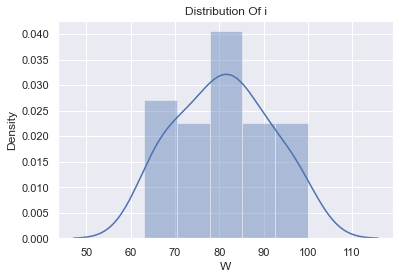

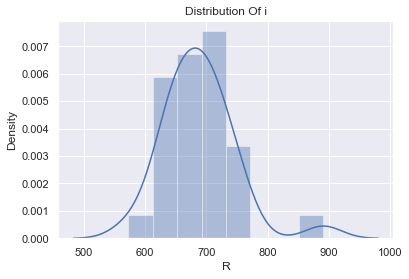

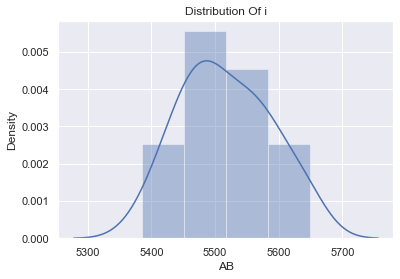

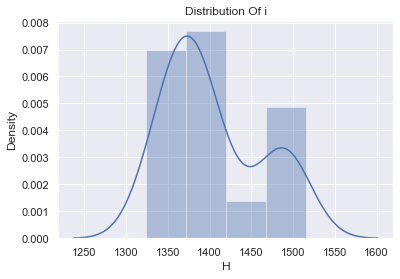

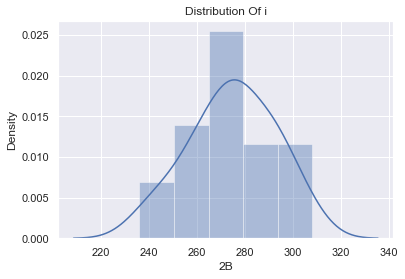

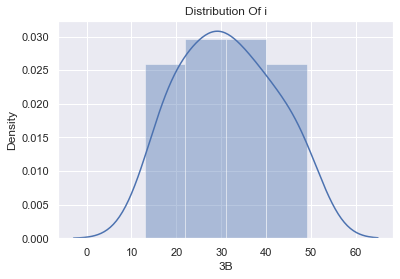

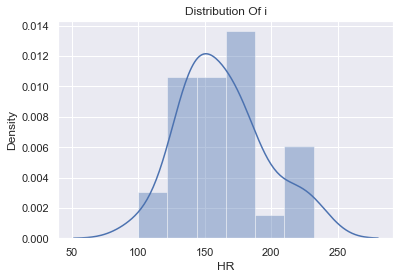

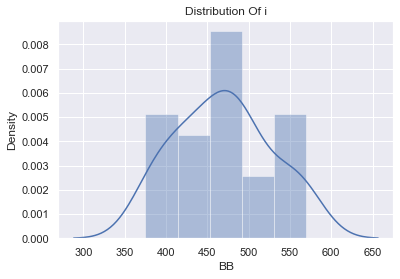

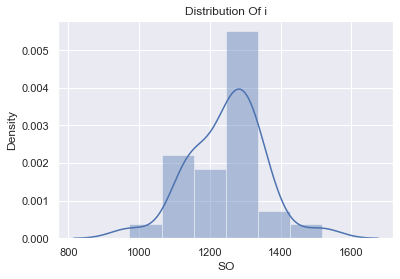

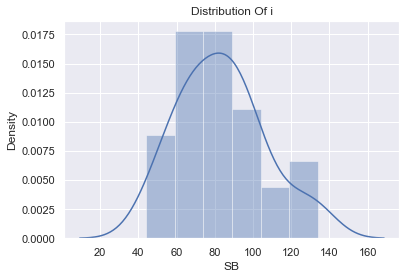

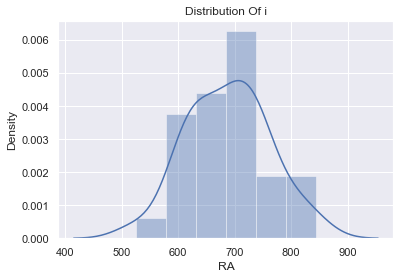

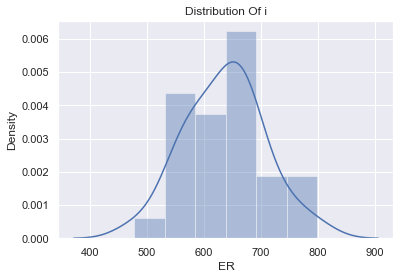

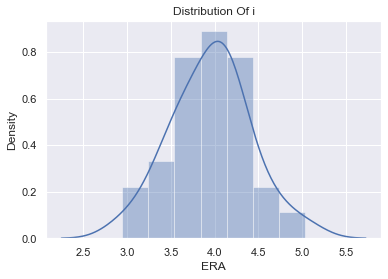

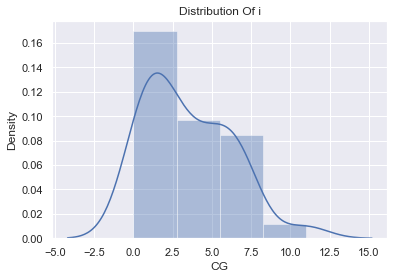

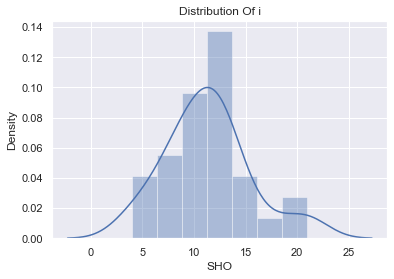

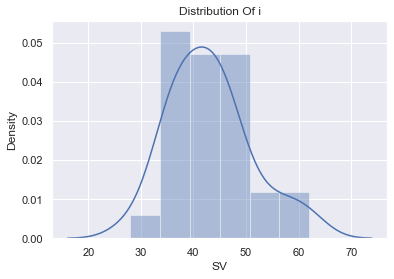

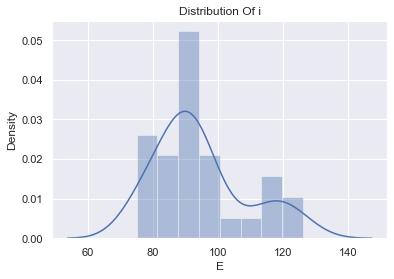

In [18]:
col = df.columns
sns.set_theme()
for i in col:
    sns.distplot(df[i])
    plt.title( "Distribution Of i")
    plt.show()

### Observation:- 
1 Distplot shows that all columns are normally distributted.

### Exploratory Data Analysis
1. 17 columns in dataset, if we print a pair plot for this dataset, it will not be having very clear visibility, but it give us some idea on different columns and their relations. hence we will initially print a pari plot graph and then will take individual graph for multiverient analysis. 

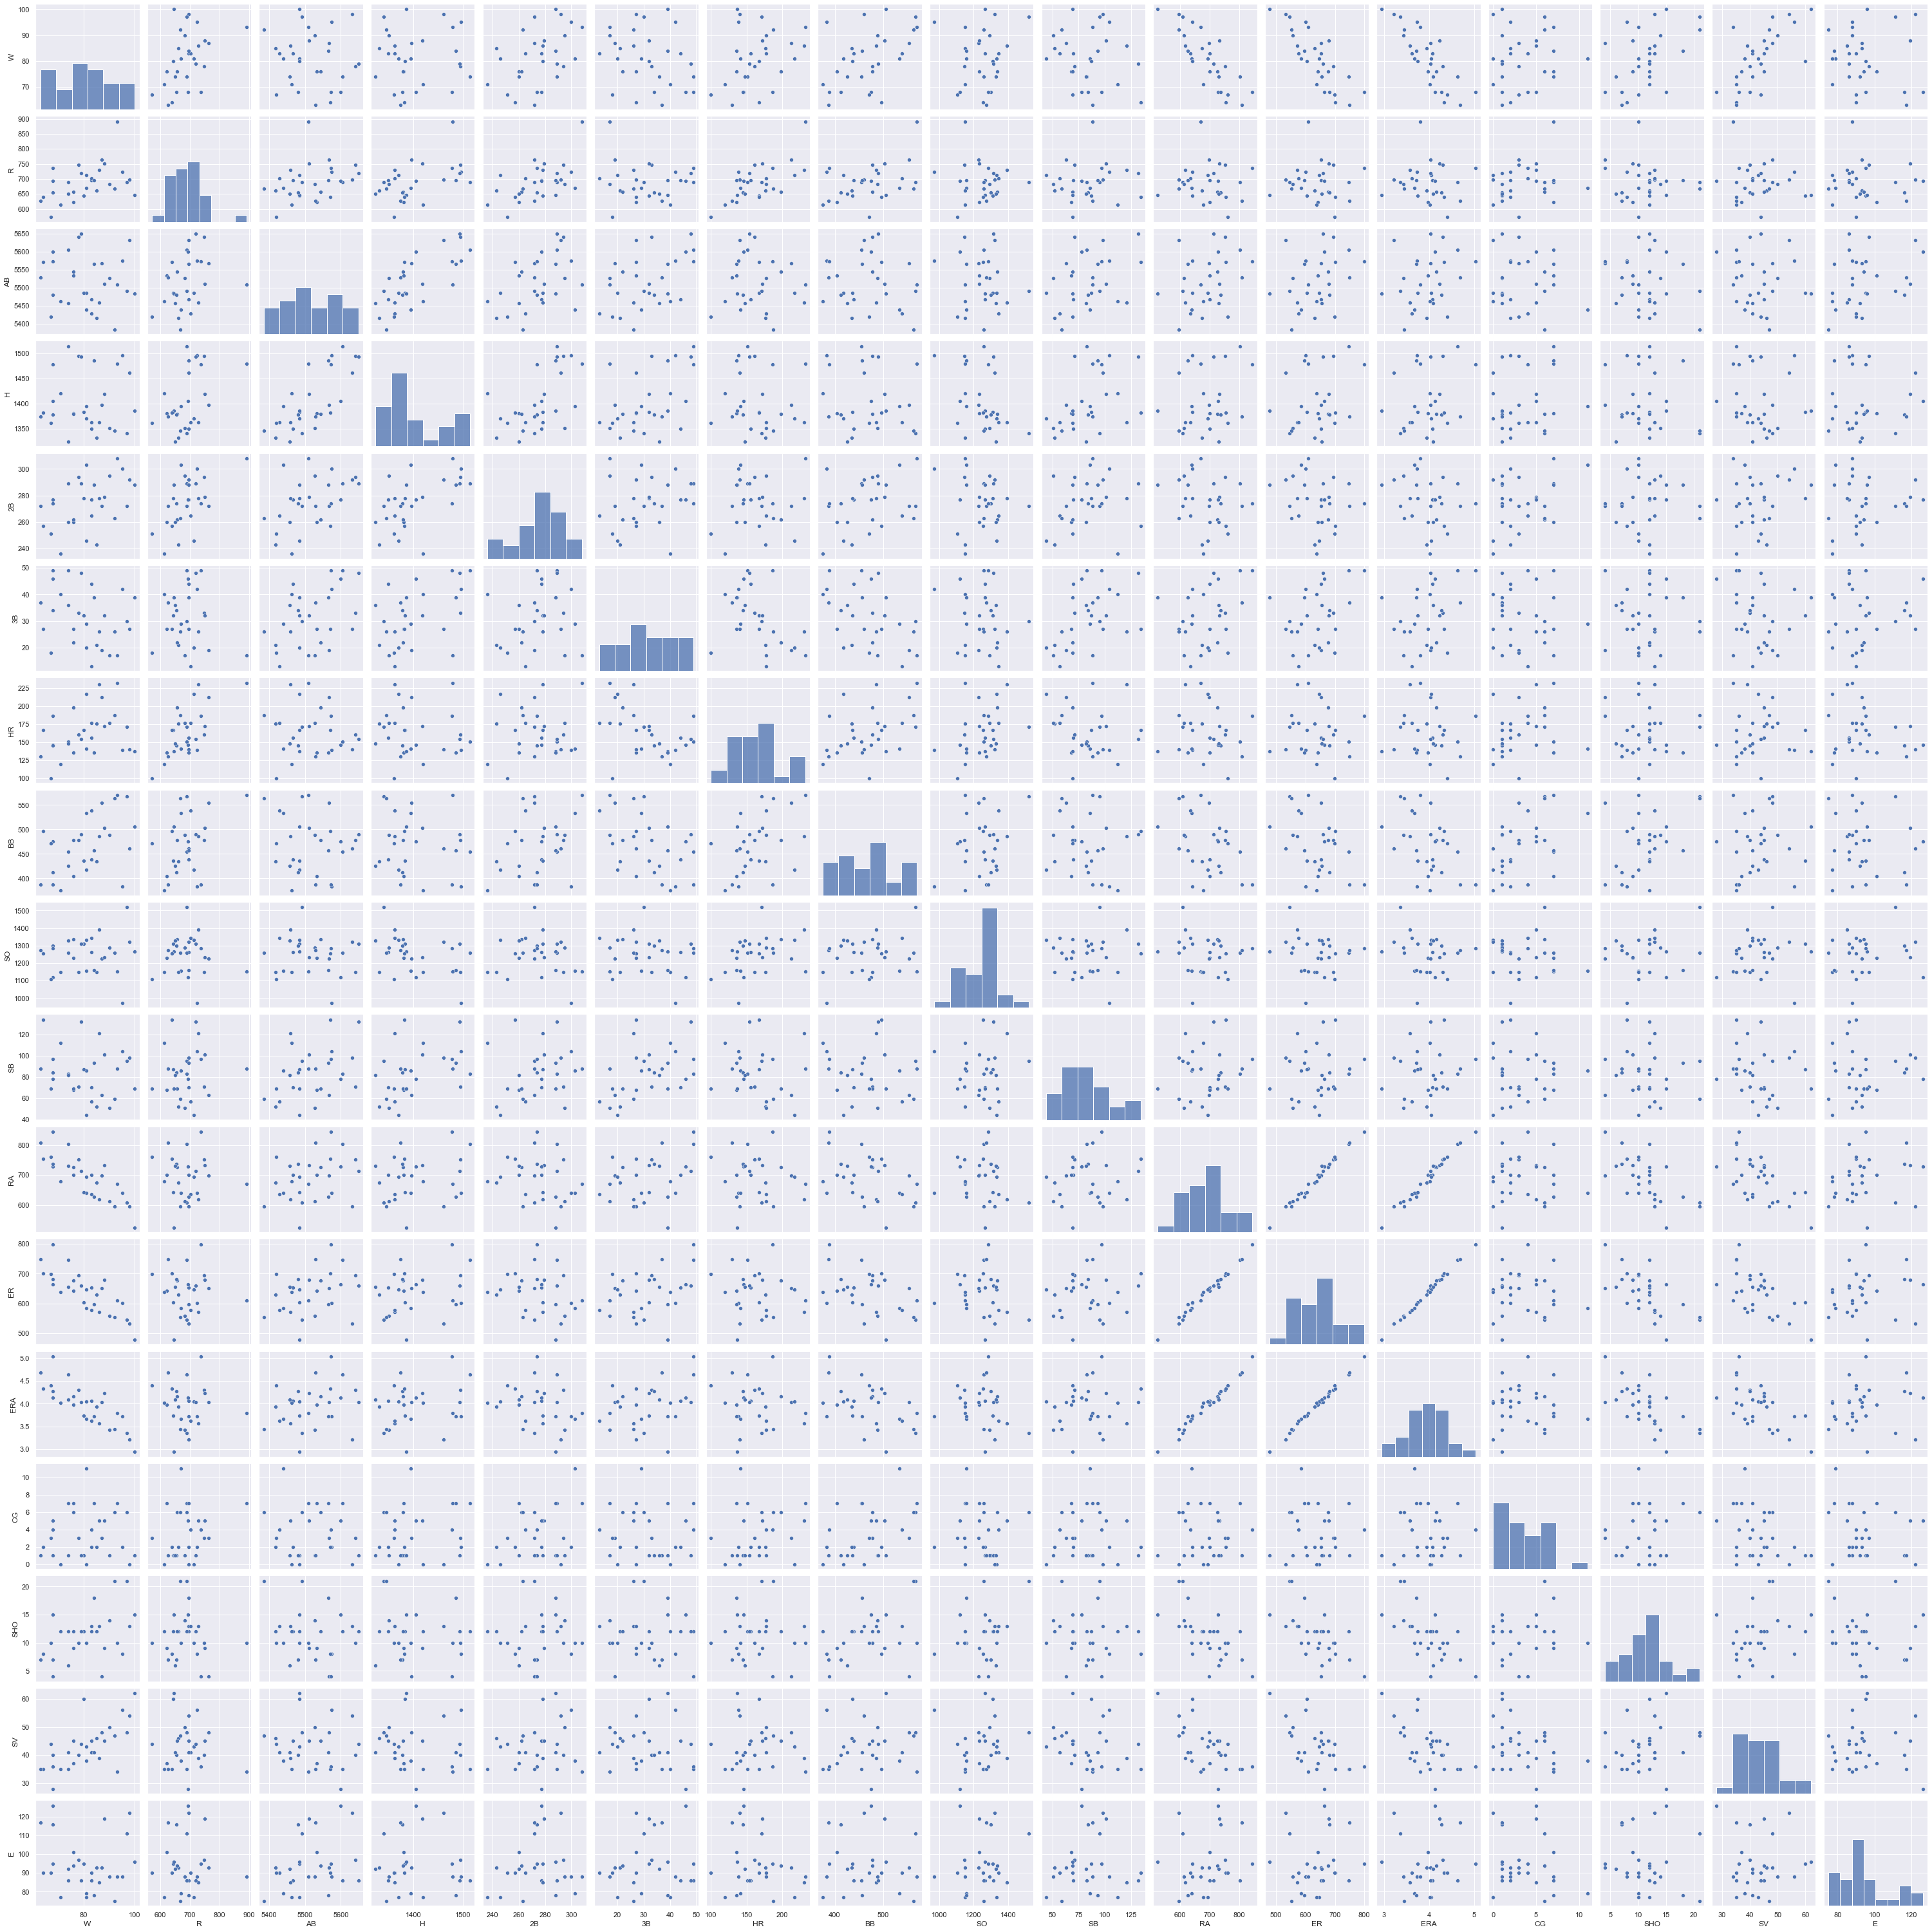

In [19]:
sns.pairplot(df)

### Obsarvation:-

1. Some variables(RA and ER ,RA and ERA) has very strong linear relation, means if one value increase then other value will also increase.
2. ERA, ER and RA has negative linear relation with WIN, it means a team Wins if he has reduced Earned Run, Earn Run Avg, and Run Earn values.

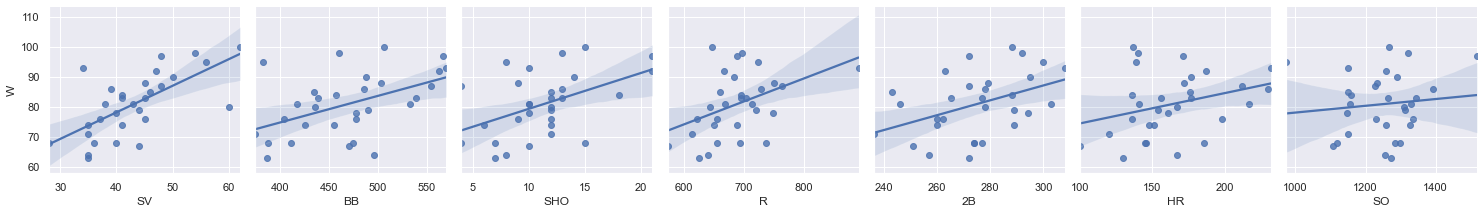

In [20]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['SV','BB','SHO','R','2B','HR','SO'], y_vars='W', height=3, aspect=1, kind='reg')
plt.show()

### Observation:-

RUN and WIN has linear relation , in scatter plot we can draw a best fit line which indicate that relation with these two parameter/variable are linear.

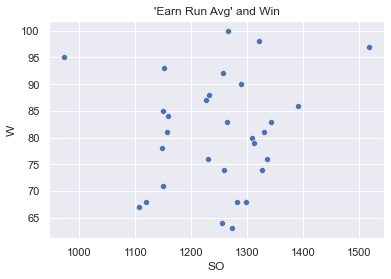

In [21]:
sns.scatterplot(data=df,x='SO',y='W')
plt.title("'Earn Run Avg' and Win")
plt.show()

### Observation:- 
StricOut has possitive correlation with WIN, If a team able to get high number of strickout then chances of winning of that team will be much high.

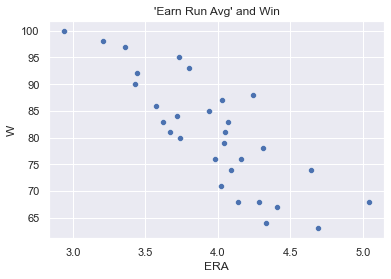

In [22]:
sns.scatterplot(data=df,x='ERA',y='W')
plt.title("'Earn Run Avg' and Win")
plt.show()

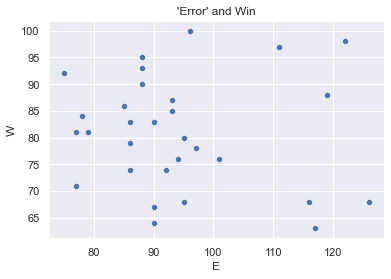

In [23]:
sns.scatterplot(data=df,x='E',y='W')
plt.title("'Error' and Win")
plt.show()

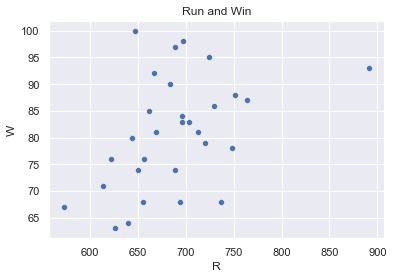

In [24]:
sns.scatterplot(data=df,x='R',y='W')
plt.title("Run and Win")
plt.show()

<AxesSubplot:xlabel='W', ylabel='Count'>

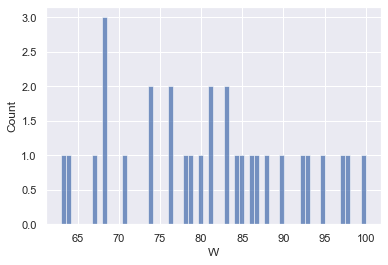

In [25]:
sns.histplot(df["W"],bins=60)

<AxesSubplot:xlabel='R', ylabel='Count'>

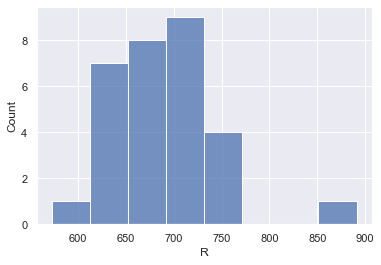

In [26]:
sns.histplot(x = df["R"])

### Observation:- 
Highest maximum winning team has total run around 700, means this is the score/total run where competetion is highest.

### Model Building

##### Train Test Split


In [27]:
x =df.drop('W', axis=1) 
y = df['W']

In [452]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.452997,1.000000,1.000000,0.870227,0.823055,0.282178,0.008295,0.000000,0.672832,0.365576,0.386803,0.379558,0.178318,0.230369,0.805024,0.227536
1,0.387460,0.538922,0.155641,0.583814,0.894985,0.427530,0.318277,0.561229,0.299194,0.591140,0.584785,0.575685,0.180413,0.464985,0.506209,0.206903
2,0.314575,0.691901,0.523225,1.000000,0.467796,0.318973,0.821609,0.379306,0.489129,0.404368,0.368428,0.385641,1.000000,0.354803,0.312651,0.072233
3,0.122977,0.761474,0.289707,0.303221,0.397071,0.262696,0.121898,0.481328,0.270088,0.575130,0.533616,0.513030,0.626298,0.288810,0.266525,0.505917
4,0.292277,0.149439,0.923736,0.627841,0.995436,0.351767,0.327664,0.479156,0.417865,0.855916,0.818987,0.793400,0.611782,0.443563,0.186023,0.150414


In [453]:
x.shape

(30, 16)

In [454]:
y.shape

(30,)

In [455]:
maxAccu = 0
maxRS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = r2_score(y_test, LR.predict(x_test))
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.9104904639702227 on Random_state 165


In [456]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=165)

### Linear Regression Model

In [568]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
#predict the value
y_pred = lm.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",lm.score(x_test,y_test) )

R2 Score 0.9104904639702227
Score  0.9104904639702227


In [569]:
lm.coef_

array([ 21.21597432, -40.59749496, -15.96559128, -10.30505989,
        -0.77886061, -12.99687374,  -7.1111936 , -48.24583412,
        -1.7375663 ,   3.53439308,  11.12841466, -67.42358991,
         7.7784739 ,   2.58341799,  21.90023216,  -4.00018419])

In [622]:
print('error:')
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error 3.0113507363874827
Mean Squared error: 11.333187923758244
Root Mean Squared Error: 3.3664800495113947


### Cross Validation:-


In [683]:
scores = cross_val_score(lm, x, y, cv=4, scoring='neg_mean_squared_error')
scores.mean()

-39.46159615767588

In [624]:
pd.set_option('display.max_column',None)

 ### Random Forest Regressor

In [572]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",rf.score(x_test, y_test) )

R2 Score 0.5248631747386387
Score  0.5248631747386387


In [573]:
print('error:')
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error 6.242222222222221
Mean Squared error: 54.98682222222223
Root Mean Squared Error: 7.415309988275759


### Lasso

In [689]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=0.084,normalize=True)    ## Alpha Value we get from best parameter tuning using Gridsearch CV, before this we use below comment alpha value 0.5
#ls=lasso(alpha=0.05) #default
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",ls.score(x_test,y_test) )

R2 Score 0.909690739905676
Score  0.909690739905676


In [688]:
print('error:')
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error 2.8609890013567187
Mean Squared error: 10.451345729928311
Root Mean Squared Error: 3.2328541151633043


In [631]:
ls.coef_

array([ 19.71524919,  -0.        ,   0.84101764,   0.        ,
         0.        ,  -0.        ,   1.7553745 ,   0.        ,
         0.        ,  -0.        ,  -0.        , -21.77219182,
         1.85304807,   1.63146953,  14.98220769,  -0.        ])

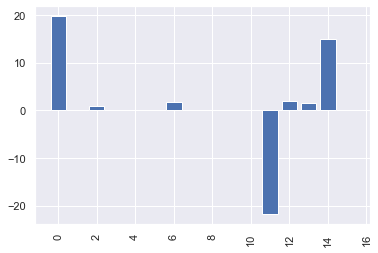

In [632]:
plt.bar(x.columns,ls.coef_)
plt.xticks(rotation='vertical')
plt.show()

In [681]:
scores = cross_val_score(ls, x, y, cv=4, scoring='neg_mean_squared_error')
scores.mean()

-14.978057183365488

### Ridge

In [679]:
#try to minimize the coeefocoent variance 
rd = Ridge(alpha=0.012, normalize=True)
#rd.Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",rd.score(x_train,y_train) )

R2 Score 0.9159874959402609
Score  0.9419462533132011


In [680]:
print('error:')
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error 2.811368613952771
Mean Squared error: 9.722632259950547
Root Mean Squared Error: 3.118113573933853


### Cross Validation 

In [684]:
scores = cross_val_score(rd, x, y, cv=4, scoring='neg_mean_squared_error')
scores.mean()

-17.103034696110463

### Hyper Parameter Tuning

In [685]:
from sklearn.model_selection import GridSearchCV

#alphas = np.arange(0, 1, 0.01)
model = Lasso()
cv = KFold(n_splits = 4)
grid = dict()
grid['alpha'] =   np.arange(0, 1, 0.001)                   #[0.001,0.01,0.1,0.11,0.12,0.13,1.0,10.0,100.0]
#print(grid)
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(x, y)

# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)



MSE: -15.283
Config: {'alpha': 0.084}


In [648]:
print( results.best_score_)

-17.867702144749007


In [678]:
from sklearn.model_selection import GridSearchCV

#alphas = np.arange(0, 1, 0.01)
model = Ridge()
cv = KFold(n_splits = 4)
grid = dict()
grid['alpha'] =   np.arange(0, 1, 0.001)                   #[0.001,0.01,0.1,0.11,0.12,0.13,1.0,10.0,100.0]
#print(grid)
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(x, y)

# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -16.730
Config: {'alpha': 0.012}


## Observation:- Highest R2 Score(.90) coming from Lasso regression model with hyper tunned alpha value 0.084.

Save model with Tunned parameters.


In [690]:
import joblib 
joblib.dump(ls,'BaseBall_Win.pki')

['BaseBall_Win.pki']

In [691]:
model = joblib.load('BaseBall_Win.pki')

In [694]:
prediction = model.predict(x_test)

ds_pred = pd.DataFrame(prediction)

In [695]:
ds_pred.to_csv('baseball_win_predicted_value.csv')

In [696]:
y_test

24    63
9     78
27    79
19    64
16    98
23    67
12    85
21    83
1     83
Name: W, dtype: int64

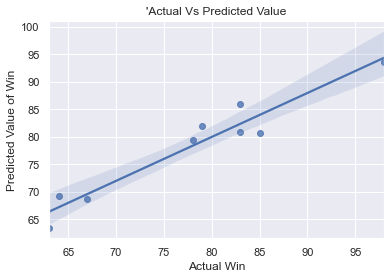

In [699]:
ax = sns.regplot(y_test,y_pred)
ax.set(xlabel="Actual Win", ylabel = "Predicted Value of Win")
plt.title("'Actual Vs Predicted Value")
plt.show()

## All predicted values data point are inthe range of best fit lines